In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
latin_distances = pd.read_csv('./outputs/latin_distances.csv')

In [7]:
# p46stgbs politizado
# s13 irse del pais
# p18st ideologia
# s16 estudios
# s17 estudios padres

columns = ['gpt_distance_norm', 'cohere_distance_norm', 'bard_distance_norm', 'edad', 'sexo', 'p18st', 's16', 's13', 's17', 'p46stgbs']

latin_distances = latin_distances.dropna(subset=columns)

In [13]:
def ols_of(model, title):
    X = latin_distances[['edad', 'sexo', 'p18st', 's16', 's13', 's17', 'p46stgbs']]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = latin_distances[model+'_distance_norm']

    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Predict values and calculate residuals
    predicted_values = model.predict(X)
    residuals = y - predicted_values

    # Plot residuals vs predicted values
    plt.scatter(predicted_values, residuals)
    plt.xlabel('Valores Predichos')
    plt.ylabel('Residuos')
    plt.title(title) # 'Gráfico de Residuos vs Valores Predichos GPT'
    plt.axhline(y=0, linestyle='--', color='grey')
    return plt

                            OLS Regression Results                            
Dep. Variable:     bard_distance_norm   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     276.0
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          3.44e-244
Time:                        15:24:51   Log-Likelihood:                -1132.5
No. Observations:                1200   AIC:                             2281.
Df Residuals:                    1192   BIC:                             2322.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2093      0.125     17.716      0.0

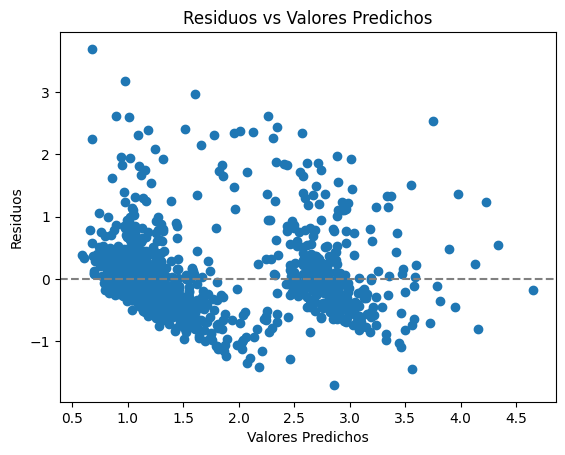

In [18]:
ols_of('bard', 'Residuos vs Valores Predichos').show()

In [21]:
latin_distances[latin_distances['p18st'] == 97]

,Unnamed: 0,numinves,idenpa,numentre,reg,ciudad,tamciud,comdist,edad,sexo,...,bard_num_preg,bard_distance_norm,gpt_results,gpt_distance,gpt_num_preg,gpt_distance_norm,cohere_results,cohere_distance,cohere_num_preg,cohere_distance_norm
4,4,2020,32,3200005,32211,32211004,-4,926,38,1,...,59,2.271186,"(14, 25, 0.56)",14,25,0.56,"(37, 25, 1.48)",37,25,1.48
5,5,2020,32,3200006,32002,32301026,-4,2,62,2,...,59,2.881356,"(32, 25, 1.28)",32,25,1.28,"(31, 25, 1.24)",31,25,1.24
6,6,2020,32,3200007,32211,32301000,-4,9,27,2,...,59,2.559322,"(26, 25, 1.04)",26,25,1.04,"(46, 25, 1.84)",46,25,1.84
14,14,2020,32,3200015,32101,32101014,-4,2344,35,2,...,59,4.661017,"(94, 25, 3.76)",94,25,3.76,"(62, 25, 2.48)",62,25,2.48
31,31,2020,32,3200032,32002,32301950,-4,266,64,2,...,59,2.338983,"(26, 25, 1.04)",26,25,1.04,"(39, 25, 1.56)",39,25,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1190,2020,32,3201191,32302,32302002,-4,16,57,2,...,59,3.288136,"(45, 25, 1.8)",45,25,1.80,"(68, 25, 2.72)",68,25,2.72
1191,1191,2020,32,3201192,32002,32301002,-4,2,36,1,...,59,2.881356,"(32, 25, 1.28)",32,25,1.28,"(21, 25, 0.84)",21,25,0.84
1194,1194,2020,32,3201195,32101,32301020,-4,2369,35,2,...,59,3.288136,"(40, 25, 1.6)",40,25,1.60,"(45, 25, 1.8)",45,25,1.80
1197,1197,2020,32,3201198,32304,32001001,-4,31,41,1,...,59,2.762712,"(40, 25, 1.6)",40,25,1.60,"(43, 25, 1.72)",43,25,1.72
